# 1D Linear Regression — Summary

This notebook summarizes the **1D linear regression** implemented in `lr_1d.py`. The goal is to fit a line to $(x, y)$ data using the **closed-form solution** (no gradient descent): we load data from `data_1d.csv`, compute slope and intercept via the normal equations, plot the fit, and report **R²**.

Course notes: [Data Science: Linear Regression in Python](https://deeplearningcourses.com/c/data-science-linear-regression-in-python) / [Udemy](https://www.udemy.com/data-science-linear-regression-in-python).

## Model and notation

- **Data:** $(x_i, y_i)$ for $i = 1, \ldots, n$; sample means $\bar{x}$, $\bar{y}$.
- **Predictions:** $\hat{y}_i = a x_i + b$.
- **Model equation:**
  $$
  \hat{y} = a x + b
  $$
  where $a$ is the slope and $b$ is the intercept.

## Closed-form solution

The slope and intercept that minimize the sum of squared residuals are:

**Slope:**
$$
a = \frac{\sum_{i}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i}(x_i - \bar{x})^2} = \frac{\text{Cov}(X,Y)}{\text{Var}(X)}
$$

**Intercept:**
$$
b = \bar{y} - a \bar{x}
$$

**Useful identity for the denominator:** $\sum_i x_i^2 - n\bar{x}^2 = \sum_i (x_i - \bar{x})^2$.  
**Numerator for $a$:** $\sum_i x_i y_i - n \bar{x}\bar{y} = \sum_i (x_i - \bar{x})(y_i - \bar{y})$.

In the script, these are implemented using `X.dot(X)`, `X.dot(Y)`, `X.sum()`, and `X.mean()`.

## Goodness of fit: R²

- **Residual sum of squares:** $SS_{\text{res}} = \sum_i (y_i - \hat{y}_i)^2$
- **Total sum of squares:** $SS_{\text{tot}} = \sum_i (y_i - \bar{y})^2$

**Coefficient of determination:**
$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}} = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - \bar{y})^2}
$$

$R^2$ is the fraction of variance in $y$ explained by the model; it lies between 0 and 1 (higher is better).

## Code mapping (`lr_1d.py`)

| Formula / quantity | Code (line) |
|--------------------|-------------|
| **Denominator** $\sum_i x_i^2 - n\bar{x}^2$ | `denominator = X.dot(X) - X.mean() * X.sum()` (38) |
| **Slope** $a$ | `a = (X.dot(Y) - Y.mean()*X.sum()) / denominator` (39) |
| **Intercept** $b$ | `b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator` (40) |
| **Predictions** $\hat{Y} = aX + b$ | `Yhat = a*X + b` (43) |
| **R²** $1 - SS_{\text{res}}/SS_{\text{tot}}$ | `d1 = Y - Yhat`, `d2 = Y - Y.mean()`, `r2 = 1 - d1.dot(d1)/d2.dot(d2)` (51–53) |

---
## Imports

We use **NumPy** for array operations (dot products, means, sums) and **Matplotlib** for plotting.

In [13]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt

## Load the data

Read $(x, y)$ pairs from `data_1d.csv` (one pair per line, comma-separated) and convert them to NumPy arrays. These are our observations $(x_i, y_i)$ for $i = 1, \ldots, n$.

In [12]:
X = []
Y = []
for line in open('data_1d.csv'):
    x, y = line.split(',')
    X.append(float(x))
    Y.append(float(y))

X = np.array(X)
Y = np.array(Y)

## Plot the raw data

Scatter plot of $y$ vs $x$ to visualize the data before fitting.

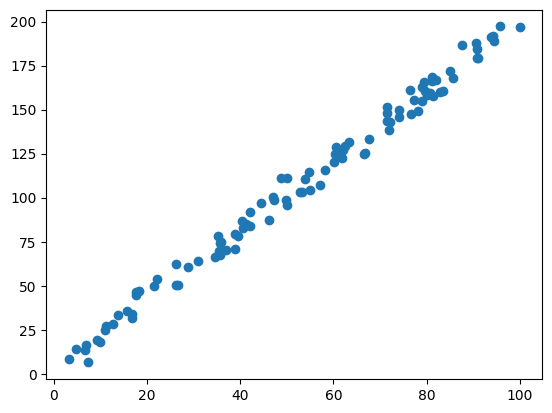

In [14]:
plt.scatter(X, Y)
plt.show()

## Fit the line: slope and intercept

We compute $a$ and $b$ from the closed-form solution. The **denominator** (common to both) is $\sum_i x_i^2 - n\bar{x}^2 = \sum_i (x_i - \bar{x})^2$. Then:

$$
a = \frac{\sum_i x_i y_i - n\bar{x}\bar{y}}{\text{denominator}} = \frac{\text{Cov}(X,Y)}{\text{Var}(X)}, \qquad
b = \frac{\bar{y} \sum_i x_i^2 - \bar{x} \sum_i x_i y_i}{\text{denominator}} = \bar{y} - a\bar{x}
$$

In code: `X.dot(X)` is $\sum_i x_i^2$, `X.dot(Y)` is $\sum_i x_i y_i$, `X.sum()` is $\sum_i x_i$, and `X.mean()` is $\bar{x}$ (and similarly for $Y$).

In [15]:
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

## Predicted values

Apply the fitted line to get predictions for each $x_i$:
$$
\hat{y}_i = a x_i + b
$$

In [16]:
Yhat = a * X + b

## Making a prediction for a new value

Once we have fitted the model (computed $a$ and $b$), we can predict $y$ for any new $x$ value using the formula:

$$
\hat{y}_{\text{new}} = a \cdot x_{\text{new}} + b
$$

Simply plug the new $x$ value into the equation. For example, to predict $y$ when $x = 5$:

In [17]:
# Example: predict y for a new x value
x_new = 5
y_predicted = a * x_new + b
print(f"For x = {x_new}, predicted y = {y_predicted:.4f}")

For x = 5, predicted y = 12.7275


## Plot data and fitted line

Overlay the scatter plot with the regression line $\hat{y} = a x + b$.

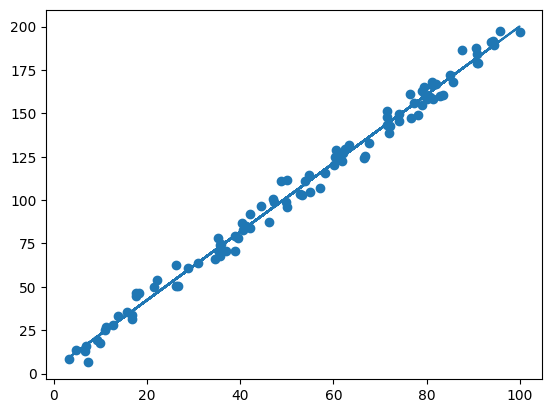

In [18]:
plt.scatter(X, Y)
plt.plot(X, Yhat)
plt.show()

## R-squared (goodness of fit)

We measure fit quality with the coefficient of determination:
$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}} = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - \bar{y})^2}
$$
Here $d1 = Y - \hat{Y}$ (residuals), $d2 = Y - \bar{y}$ (deviations from mean); $d1 \cdot d1$ is $SS_{\text{res}}$ and $d2 \cdot d2$ is $SS_{\text{tot}}$.

In [19]:
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("the r-squared is:", r2)

the r-squared is: 0.9911838202977805
